# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
# Checking the number of mice.
mice_count = len(merge_df["Mouse ID"].unique())
mice_count


249

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_id_data = merge_df.loc[merge_df["Mouse ID"] == 'g989']
dup_mice_id_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = merge_df.loc[merge_df["Mouse ID"] != 'g989']
clean_df = merge_df.loc[merge_df["Mouse ID"].isin(['g989'])== False]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [54]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_df["Mouse ID"].nunique()
clean_count


248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_regimen_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_regimen_var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_regimen_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_regimen_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({
    
    "Mean" : drug_regimen_mean,
    "Median" : drug_regimen_median,
    "Variance" : drug_regimen_var,
    "Standard Dev" : drug_regimen_std,
    "SEM" : drug_regimen_sem
})

summary_statistics

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
#summary_statistics_agg = summary_statistics.agg({'Mean' : ['mean'], 'Median' : ['median']})
#summary_statistics_agg

,Mean,Median
mean,50.975982,NaN
median,NaN,51.819532


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

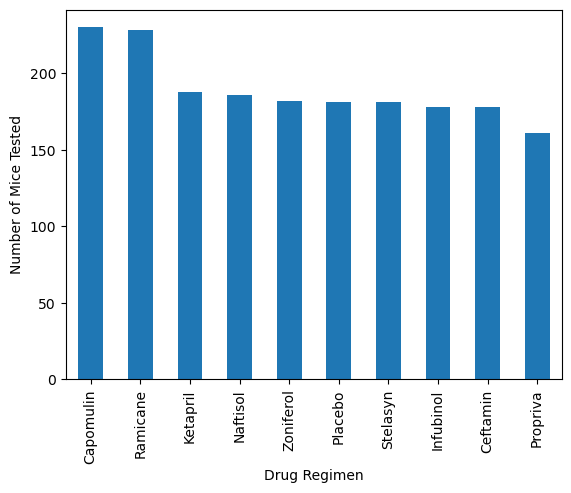

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Returns the timepoint for each drug regimen
pandas_bar = merge_df["Drug Regimen"].value_counts()
#Creats the bar plot
first_bar_plot = pandas_bar.plot.bar(x=drug_regimen, rot = 90)
#Set labels for the x and y axis
first_bar_plot.set_xlabel("Drug Regimen")
first_bar_plot.set_ylabel("Number of Mice Tested")
#Show the plot
first_bar_plot


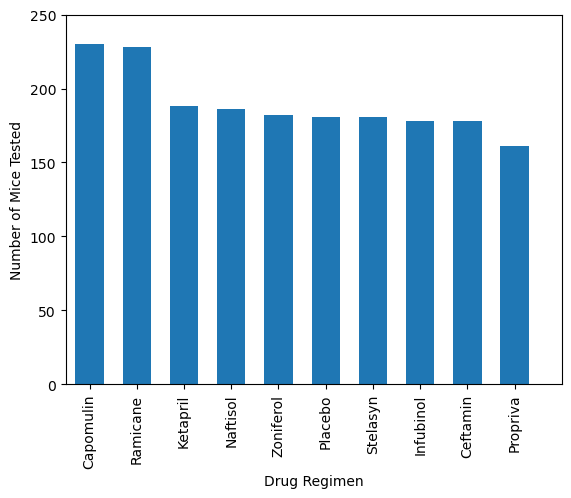

In [77]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Returns the timepoint for each drug regimen
drug_count = merge_df["Drug Regimen"].value_counts()

#Returns number of mice tested
x_axis = np.arange(len(drug_count))

#Creat bar chart based on data above
plt.bar(x_axis, drug_count, width = .6)

#Create ticks for the x axis
plt.xticks(x_axis, drug_count.index, rotation=90)

#Set limit for x axis
plt.xlim(-.5,10)

#Set limit for y axis
plt.ylim(0,250)

#Set x and y axis labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

#Show the bar plot
plt.show()






<AxesSubplot:ylabel='Sex'>

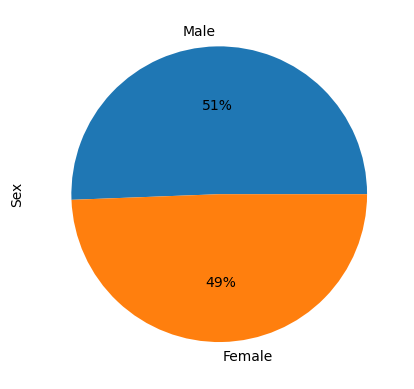

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Distribution of sex
pie_panda = merge_df["Sex"].value_counts()

#Plot in a pie plot
pie_panda_plot = pie_panda.plot.pie(y= "Sex", autopct="%1.0f%%", startangle=360)

#Show the pie plot
pie_panda_plot

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)>

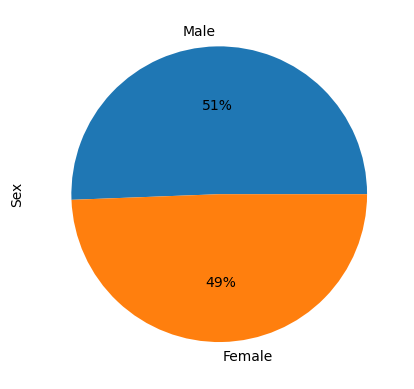

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Create labels for pie chart
labels = ["Male", "Female"]

#Distribution of Sex
pie_plot = merge_df["Sex"].value_counts()

#Plot in the pie plot
plt.pie(pie_plot, labels=labels, autopct="%1.0f%%", startangle=360)

#Plot the title
plt.ylabel ("Sex")

#Show the pie plot
plt.pie




## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(merge_df.groupby("Mouse ID")['Timepoint'].max())
max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merge_df = pd.merge(merge_df, max_timepoint_df, on=("Mouse ID", "Timepoint"), how="right")
new_merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [115]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drugs:
    if ("Drug Regimen") == drugs[0]:
        tumor_vol_data.append(["Tumor Volume (mm3)"])
    if ("Drug Regimen") == drugs[1]:
        tumor_vol_data.append(["Tumor Volume (mm3)"])
    if ("Drug Regimen") == drugs[2]:
        tumor_vol_data.append(["Tumor Volume (mm3)"])
    if ("Drug Regimen") == drugs[3]:
        tumor_vol_data.append(["Tumor Volume (mm3)"])
    
    

print(tumor_vol_data)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[]


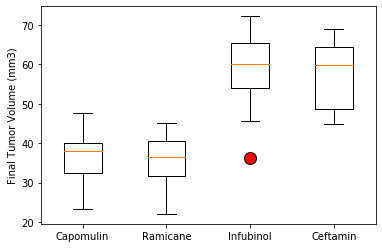

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

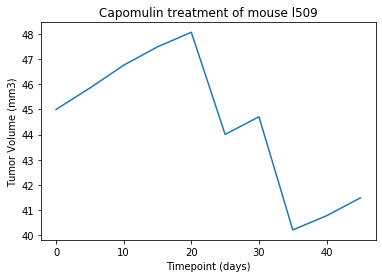

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



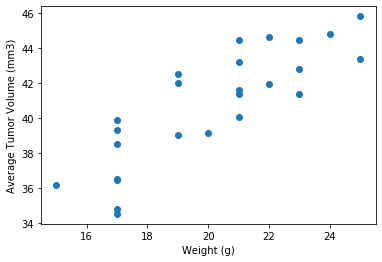

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


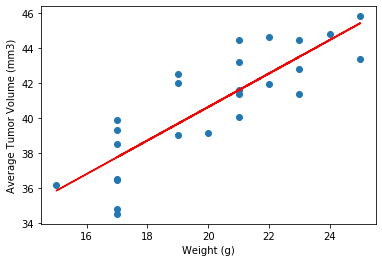

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

